In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')

d:\Anaconda\envs\cursito\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


apply() - Calculate project salary next year

In [2]:
help(df.apply)

df_salary = df[pd.notna(df['salary_year_avg'])].copy()

Help on method apply in module pandas.core.frame:

apply(func: 'AggFuncType', axis: 'Axis' = 0, raw: 'bool' = False, result_type: "Literal['expand', 'reduce', 'broadcast'] | None" = None, args=(), by_row: "Literal[False, 'compat']" = 'compat', engine: "Literal['python', 'numba']" = 'python', engine_kwargs: 'dict[str, bool] | None' = None, **kwargs) method of pandas.core.frame.DataFrame instance
    Apply a function along an axis of the DataFrame.
    
    Objects passed to the function are Series objects whose index is
    either the DataFrame's index (``axis=0``) or the DataFrame's columns
    (``axis=1``). By default (``result_type=None``), the final return type
    is inferred from the return type of the applied function. Otherwise,
    it depends on the `result_type` argument.
    
    Parameters
    ----------
    func : function
        Function to apply to each column or row.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Axis along which the function is applied:
 

In [3]:
df_salary['salary_year_inflated'] = df_salary['salary_year_avg'].apply(lambda salary: salary *1.03)
# Despues podemos hacer lo mismo pero solo para trabajos argentinos y proyectando la inflacion anual

In [4]:
df_salary

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,salary_year_inflated
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd...",112785.00
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac...",144200.00
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}",123600.00
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr...",235068.66
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",91670.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab...",143392.48
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None,154500.00
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':...",228531.25
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ...",162225.00


In [5]:
df['job_skills'][1]
#In this row it looks like a list but is in string type, so we need to convert it into a list with ast module

"['r', 'python', 'sql', 'nosql', 'power bi', 'tableau']"

In [6]:
import ast
type(ast.literal_eval(df['job_skills'][1])) # type is a list now

list

In [7]:
def clean_list(skills):
    if type(skills) == str: #pd.notna is much faster than doing type(skills) 
        return ast.literal_eval(skills) 
    

df['job_skills'] = df['job_skills'].apply(clean_list)

In [8]:
#df_salary.reset_index(inplace=True)
#type(df_salary['job_skills'][0])

def clean_list_pd(skills):
    if pd.notna(skills):
        return ast.literal_eval(skills)
    
df_salary['job_skills'] = df_salary['job_skills'].apply(clean_list_pd)


Calculate for senior roles 5% for increase next year, other roles get 3%

In [9]:
def projected_salary(row):
    if "Senior" in row['job_title_short']:
        return row['salary_year_avg'] * 1.05
    else:
        return row['salary_year_avg'] * 1.03
    
df_salary['salary_year_inflated'] = df_salary.apply(projected_salary, axis=1) #axis 1 for rows



df_salary[['salary_year_inflated', 'salary_year_avg', 'job_title_short', 'job_location']]

,salary_year_inflated,salary_year_avg,job_title_short,job_location
28,112785.00,109500.0,Data Scientist,"San José Province, San José, Costa Rica"
77,144200.00,140000.0,Data Engineer,"Arlington, VA"
92,123600.00,120000.0,Data Engineer,Anywhere
100,235068.66,228222.0,Data Scientist,"Mountain View, CA"
109,91670.00,89000.0,Data Analyst,Anywhere
...,...,...,...,...
785624,143392.48,139216.0,Data Engineer,"Mt Prospect, IL"
785641,154500.00,150000.0,Data Engineer,"New York, NY"
785648,228531.25,221875.0,Data Scientist,"Pleasant Hill, CA"
785682,162225.00,157500.0,Data Scientist,"Reutlingen, Germany"


In [10]:
df_argentina_salary = df.copy()

df_argentina_salary = df[df['job_country'] == 'Argentina']
df_argentina_salary['salary_year_inflated'] = df_argentina_salary['salary_year_avg']
df_argentina_salary = df_argentina_salary[df_argentina_salary['salary_year_avg'].notna()]


C:\Users\moco\AppData\Local\Temp\ipykernel_3376\1514529080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_argentina_salary['salary_year_inflated'] = df_argentina_salary['salary_year_avg']


In [11]:
import numpy as np
# 1. Create a mask to identify Senior works
mask_senior = df_argentina_salary['job_title_short'].str.contains("Senior", case=False, na=False)

# 2. Calculate in a vector way
df_argentina_salary['salary_year_inflated'] = np.where(
    mask_senior,
    df_argentina_salary['salary_year_avg'] * 1.45,   # Si es Senior
    df_argentina_salary['salary_year_avg'] * 1.31    # Si NO es Senior
)

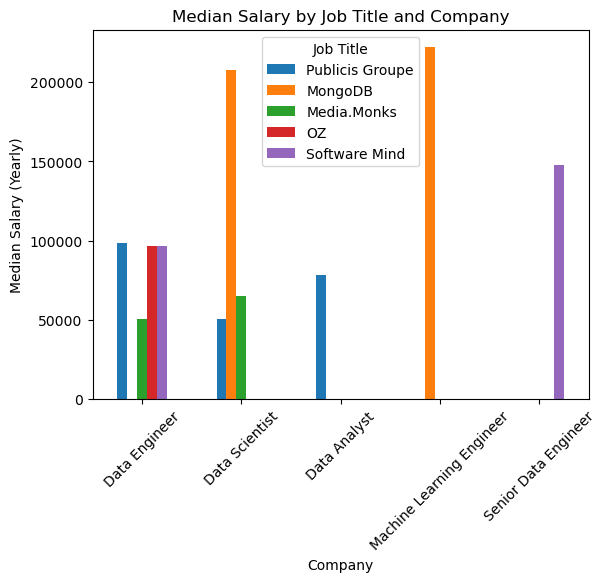

In [55]:
#index_values_na = df_argentina_salary['salary_year_avg'].dropna().index
#df_argentina_salary[index_values_na]
top_5 = df_argentina_salary['job_title_short'].value_counts().nlargest(5).index
job_5 = df_argentina_salary['company_name'].value_counts().nlargest(5).index
df_argentina_salary[df_argentina_salary['salary_year_inflated'].notna()]
df_argentina_pivot = df_argentina_salary.pivot_table(values='salary_year_avg', index='job_title_short', columns='company_name', aggfunc='median').loc[top_5]
df_argentina_job = df_argentina_pivot[job_5]
df_argentina_job.plot(kind='bar')
plt.title('Median Salary by Job Title and Company')
plt.ylabel('Median Salary (Yearly)')
plt.xlabel('Company')
plt.xticks(rotation=45)
plt.legend(title='Job Title')


In [50]:
top_5

Index(['Data Engineer', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Senior Data Engineer'],
      dtype='object', name='job_title_short')